# Partitions and Community Detection

Welcome to the second session on Network Theory presented to you by the Graph Gang! The first part of this script is to accompany the presentation.

The 'Practical' is there for you to try out what you learn from the 'Karate Club' network on a larger network.

## Content of Presentation
- K-connectedness and -partitions          -- Identify of paths
- Cut edges and Cut vertices               -- Identify Cut edges
- Contractions and minors                  -- Contracted [X] network
- Global Agorithms                         -- Modularity
- Local / Iterative Improvement            -- Kernighan-Lin
- Multilevel Graph Partitioning            -- Demonstration
- Evolutionary Methods and Metaheuristics  -- Simmulated Annealing


## Karate Club Network

Import libraries (same as in previous session)

In [11]:
import networkx as nx
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

(note: had to update my networkx package through terminal 'conda upgrade networkx')

load Network and Matrix Yuka made you save in the last lesson

In [12]:
### Import network data from a matrix
m = np.loadtxt("matrix_karate_club.txt",delimiter=' ') # import adjacency matrix
g = nx.Graph(m) # convert the matrix into an undirected simple graph

Alternatively just generate it again

In [13]:
### Generate a data set of karate club social network 
g = nx.karate_club_graph()
m = nx.adjacency_matrix(g)
m = m.todense()


Check the Karate Club network

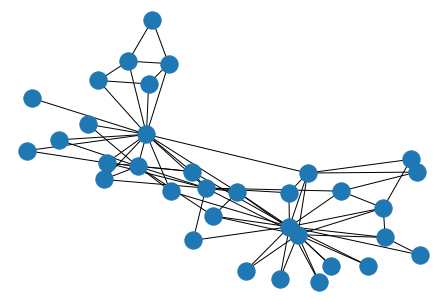

In [14]:
nx.draw(g)
plt.show()

Format the layout and label the nodes

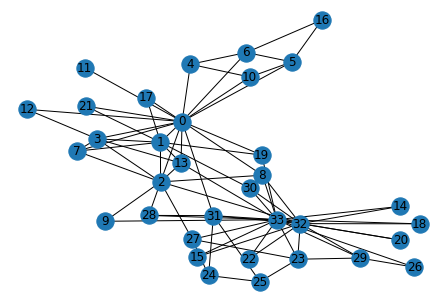

In [15]:
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos)
nx.draw_networkx_labels(g,pos=pos)
plt.show()

Calculate the minimum number of nodes that would need to be removed to disconnect this graph and identify those (cut) nodes

In [16]:
print("Number of cuts needed to disconnect network: {}".format(nx.edge_connectivity(g)))
print("ID of cut nodes: {}".format(nx.minimum_edge_cut(g)))


Number of cuts needed to disconnect network: 1
ID of cut nodes: {(11, 0)}


Colour graph by 'k' components (the maximal subgraph that has at least node connectivity k)

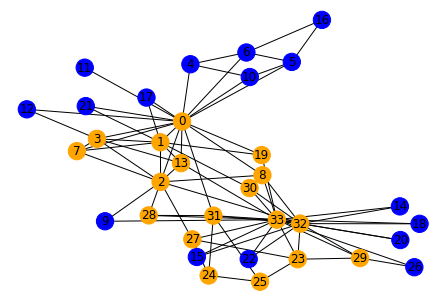

In [17]:
k = 3 #Optional: adjust this value to see supgraphs with specified k-connectivity
k_list = list(nx.k_components(g)[k][0])
color_map = []
for node in g.nodes(): #might need to have str(node) [depending on environment]
    if node in set(k_list):
        color_map.append('orange')
       
    else:
        color_map.append('blue')
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos, node_color=color_map)
nx.draw_networkx_labels(g, pos=pos)
plt.show()

Show an arbritrary path that travels through the cut vertices

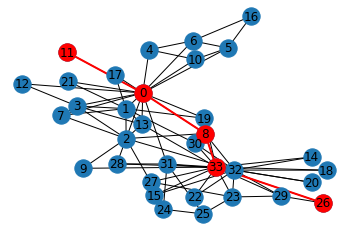

In [18]:
nx.draw_networkx_labels(g,pos)
nx.draw(g, pos=pos)

pathv = nx.shortest_path(g,source=26,target=11) # Optional: adgust start and end node of path
path_edges = list(zip(pathv,pathv[1:]))

nx.draw_networkx_nodes(g,pos,nodelist=pathv,node_color='r')
nx.draw_networkx_edges(g,pos,edgelist=path_edges,edge_color='r',width=2)

plt.show()

## Contraction

Contract chosen nodes to combine them and their edges e.g. '4' and '6'

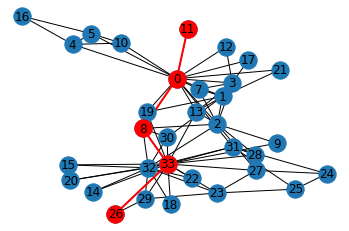

In [19]:
g_contracted = nx.contracted_nodes(g, 4, 6) #Optional: Select up to 4 nodes to contract

pos_contracted = nx.spring_layout(g_contracted,seed=1)

nx.draw_networkx_labels(g_contracted, pos = pos_contracted)



nx.draw(g_contracted, pos=pos_contracted)

path = nx.shortest_path(g_contracted,source=26,target=11)
path_edges = list(zip(path,path[1:]))

nx.draw_networkx_nodes(g_contracted,pos_contracted,nodelist=path,node_color='r')
nx.draw_networkx_edges(g_contracted,pos_contracted,edgelist=path_edges,edge_color='r',width=2)

plt.show()

## Partitions 

### Local: Iterative Improvement heuristics 

kernighan-Lin algorithm

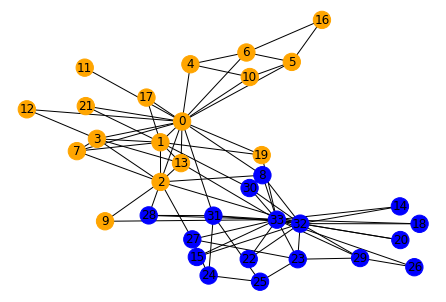

In [42]:
kl_part = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(g, seed = 3)
#Optional: adjust the 'seed' value above to randomly change the 'start point' of this algorithm

color_map = []
for node in g.nodes():
    if node in kl_part[0]:
        color_map.append('orange')
    else:
        color_map.append('blue')
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos, node_color=color_map)
nx.draw_networkx_labels(g, pos=pos)
plt.show()

Louvian Modularity Algorithm

In [21]:
greedy_partition = nx.algorithms.community.modularity_max.greedy_modularity_communities(g)

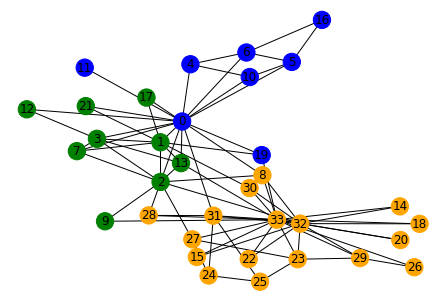

In [22]:
color_map = []
for node in g.nodes():
    if node in greedy_partition[0]:
        color_map.append('orange')
    elif node in greedy_partition[1]:
        color_map.append('green')
    else:
        color_map.append('blue')
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos, node_color=color_map)
nx.draw_networkx_labels(g, pos=pos)
plt.show()

Exercise: Contract the above network based on the community membership.

# Practical

## Football (American Football (the one where they use their hands not their feet))

Import the network (need internet connection) and read the information provided

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

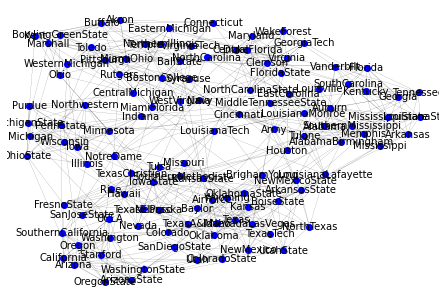

In [23]:
import urllib.request as urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "blue",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
pos1 = nx.spring_layout(G,seed=1)
nx.draw(G, pos=pos1, **options)
nx.draw_networkx_labels(G,pos=pos1, font_size = 10)

plt.show()

Colour the football team by what conference they belong to

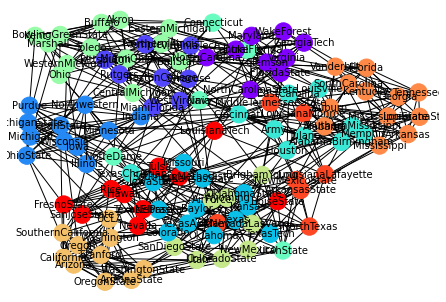

In [24]:
#Call the 'conference membership of each football team _ list(nx.get_node_attributes(G,'value').values()) 
nx.draw(G, pos1, node_color = list(nx.get_node_attributes(G,'value').values()), vmin=0, vmax=11, cmap = plt.cm.get_cmap('rainbow'))
nx.draw_networkx_labels(G,pos=pos1, font_size = 10)

plt.show()

Exercise 2.1: Calculate the minimum number of nodes that would need to be removed to disconnect this graph and identify those (cut) nodes 

Exercise 2.2: Contract the nodes of the network by their conference membership

Exercise 2.3: Partition using kernighan-Lin algorithm

Exercise 2.4: Partition using Louvian Modularity algorithm

## Dispersal Network

Import Hydrothermal Vent dispersal matrix.

(Adapted from Mitarai et al., 2016; (https://www.pnas.org/content/113/11/2976.short))

Where nodes represent known hydrothermal vents and edges represent the probablity of dispersal between them. This probability was normalized to values between 1 and 0, the actual probability is several order of magnitudes lower

In [25]:
path1 = "https://dl.dropbox.com/s/x1r5huc5i4u3dl0/dipersal_net.txt" # Directly from Dropbox


In [26]:
m = np.loadtxt(path1, delimiter=" ") # import adjacency matrix
d = nx.Graph(m)

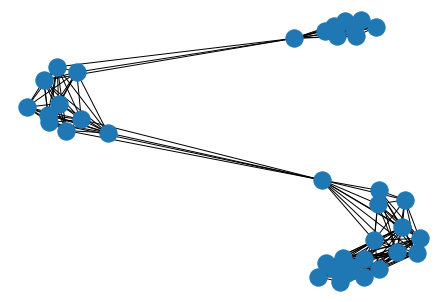

In [27]:
nx.draw(d)
plt.show()

In [28]:
import pandas as pd

Import node attributes

In [29]:
path2 = "https://dl.dropbox.com/s/yje8muwhdr19iwo/dipersal_net_attributes.txt" 

I couldn't figure out how to import a table from url but below is how i can access it on colab


In [32]:
attri = pd.read_table(path2, delimiter=' ', header = 'infer')
attri

,Id,vent,Lat.,Long.,Depth
0,1,13 N Ridge Site,13.10,143.68,2900
1,2,Alice Springs Field,18.22,144.68,3640
2,3,Bayonnaise Knoll caldera,31.97,139.73,800
3,4,Chamorro volcano,20.81,144.71,875
4,5,Doyo Seamount,27.68,140.82,520
5,6,Forecast,13.40,143.92,1470
6,7,Fukujin volcano,21.93,143.47,1100
7,8,Irabu Knoll,25.23,124.88,1850
8,9,Izena Cauldron,27.27,127.08,1450
9,10,Kaikata Seamount,26.70,141.08,930


In [33]:
d.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37))

In [34]:
node_attr = attri.set_index('Id').to_dict('index')
nx.set_node_attributes(d, node_attr)

In [35]:
d.nodes('vent')

NodeDataView({0: None, 1: '13 N Ridge Site', 2: 'Alice Springs Field', 3: 'Bayonnaise Knoll caldera', 4: 'Chamorro volcano', 5: 'Doyo Seamount', 6: 'Forecast', 7: 'Fukujin volcano', 8: 'Irabu Knoll', 9: 'Izena Cauldron', 10: 'Kaikata Seamount', 11: 'Kasuga 3 Seamount', 12: 'Mariana Mounds', 13: 'Mariana Trough plume 2', 14: 'Mariana Trough unnamed', 15: 'Minami-Ensei Knoll', 16: 'Mokuyo Seamount', 17: 'Myojin Knoll', 18: 'Myojinsho Caldera', 19: 'Natsushima 84-1 Knoll', 20: 'Nikko volcano', 21: 'North Knoll, Iheya Ridge', 22: 'Northwest Eifuku', 23: 'Northwest Rota-1 volcano', 24: 'Okinawa Trough Site ES1', 25: 'Okinawa Trough Site ES2', 26: 'Pika', 27: 'Sakai', 28: 'Seamount X', 29: 'Snail', 30: 'SPOT, Hatoma Knoll', 31: 'SPOT, Yonaguni Knoll IV', 32: 'Suiyo Seamount', 33: 'Sumisu Caldera', 34: 'Sumisu Rift', 35: 'SW Syoyo', 36: 'TOTO Caldera', 37: 'W Syoyo'}, data='vent')

In [36]:
ventID = dict(d.nodes('vent'))
d = nx.relabel_nodes(d, ventID)

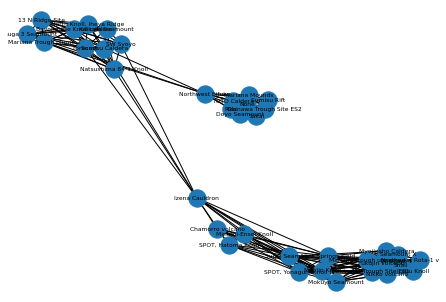

In [37]:
pos2 = nx.spring_layout(d,seed=1)
nx.draw(d, pos=pos2)
nx.draw_networkx_labels(d, pos=pos2, font_size = 6)
plt.show()

Check the attributes of one of the vents (e.g. take a peek at Pika)

In [38]:
d.nodes['Pika']

{'vent': 'Pika', 'Lat.': 12.92, 'Long.': 143.65, 'Depth': 2990}

Now carry out some measurements of this network based on what you have learned from the last two lessons and maybe you'll find something exciting that I haven't looked at into yet...